## Decoding Phone Usage Patterns in India

In [13]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

## Data Cleaning

In [15]:
# Load data
df = pd.read_csv("phone_usage_india.csv")

## Understanding the Data

In [5]:
df.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media


In [17]:
df.shape

(17686, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64  
 2   Gender                        17686 non-null  object 
 3   Location                      17686 non-null  object 
 4   Phone Brand                   17686 non-null  object 
 5   OS                            17686 non-null  object 
 6   Screen Time (hrs/day)         17686 non-null  float64
 7   Data Usage (GB/month)         17686 non-null  float64
 8   Calls Duration (mins/day)     17686 non-null  float64
 9   Number of Apps Installed      17686 non-null  int64  
 10  Social Media Time (hrs/day)   17686 non-null  float64
 11  E-commerce Spend (INR/month)  17686 non-null  int64  
 12  Streaming Time (hrs/day)      17686 non-null  float64
 13  G

In [11]:
df.describe()

,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,37.584247,6.546376,25.411257,151.405846,104.584869,3.252369,5075.707848,4.250616,2.490874,1042.785367
std,13.338252,3.172677,14.122167,84.923353,55.217097,1.590223,2871.604841,2.155683,1.446003,552.502067
min,15.000000,1.000000,1.000000,5.000000,10.000000,0.500000,100.000000,0.500000,0.000000,100.000000
25%,26.000000,3.800000,13.200000,77.325000,57.000000,1.900000,2587.500000,2.400000,1.200000,561.000000
50%,38.000000,6.600000,25.300000,150.600000,104.000000,3.200000,5052.000000,4.200000,2.500000,1040.000000
75%,49.000000,9.300000,37.600000,223.900000,152.000000,4.600000,7606.000000,6.100000,3.700000,1521.750000
max,60.000000,12.000000,50.000000,300.000000,200.000000,6.000000,10000.000000,8.000000,5.000000,2000.000000


In [5]:
df.isnull().sum()

User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [19]:
# Drop unnecessary columns
df.drop(['User ID'], axis=1, inplace=True)

## Unique & Categorical Insights

In [28]:
df.columns

Index(['Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use'],
      dtype='object')

In [30]:
for col in df.columns:
  print(f"{col}:\n Unique values:",df[col].nunique(),"\n", df[col].unique())
  print()
  print()

Age:
 Unique values: 46 
 [53 60 37 32 16 21 57 56 46 44 55 41 35 33 52 54 50 40 59 29 36 15 51 45
 39 28 23 20 22 19 49 42 17 31 43 25 34 38 30 18 24 26 58 27 48 47]


Gender:
 Unique values: 3 
 ['Male' 'Other' 'Female']


Location:
 Unique values: 10 
 ['Mumbai' 'Delhi' 'Ahmedabad' 'Pune' 'Jaipur' 'Lucknow' 'Kolkata'
 'Bangalore' 'Chennai' 'Hyderabad']


Phone Brand:
 Unique values: 10 
 ['Vivo' 'Realme' 'Nokia' 'Samsung' 'Xiaomi' 'Oppo' 'Apple' 'Google Pixel'
 'Motorola' 'OnePlus']


OS:
 Unique values: 2 
 ['Android' 'iOS']


Screen Time (hrs/day):
 Unique values: 111 
 [ 3.7  9.2  4.5 11.   2.2  5.4  6.   3.1  5.3  9.9  1.6  7.5 10.5 10.3
  1.7  5.1 11.6  9.  10.4 11.7  8.1  1.4  7.   5.6 10.7  6.3  4.   8.4
 11.4  4.1  9.4 11.9  5.5  5.2  2.5  4.4  4.2  4.3  1.5  4.7  8.6  5.8
  3.4  3.   3.5  1.3  3.2  8.3 11.2  6.9  6.8  6.1 11.1  5.7  1.8 10.
  5.   2.4  8.8  6.7 10.9 10.8  2.3  7.2 11.8  8.   7.8  3.6  4.8  7.9
  9.3  9.6  1.2  8.5  8.9  5.9 10.1  6.5  2.9  7.7  8.2  1.1  3.

## Handling Outliers

In [32]:
# Define numerical columns for outlier detection
numeric_cols = [
    "Age", "Screen Time (hrs/day)", "Data Usage (GB/month)",
    "Calls Duration (mins/day)", "Number of Apps Installed",
    "Social Media Time (hrs/day)", "E-commerce Spend (INR/month)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)", "Monthly Recharge Cost (INR)"
]

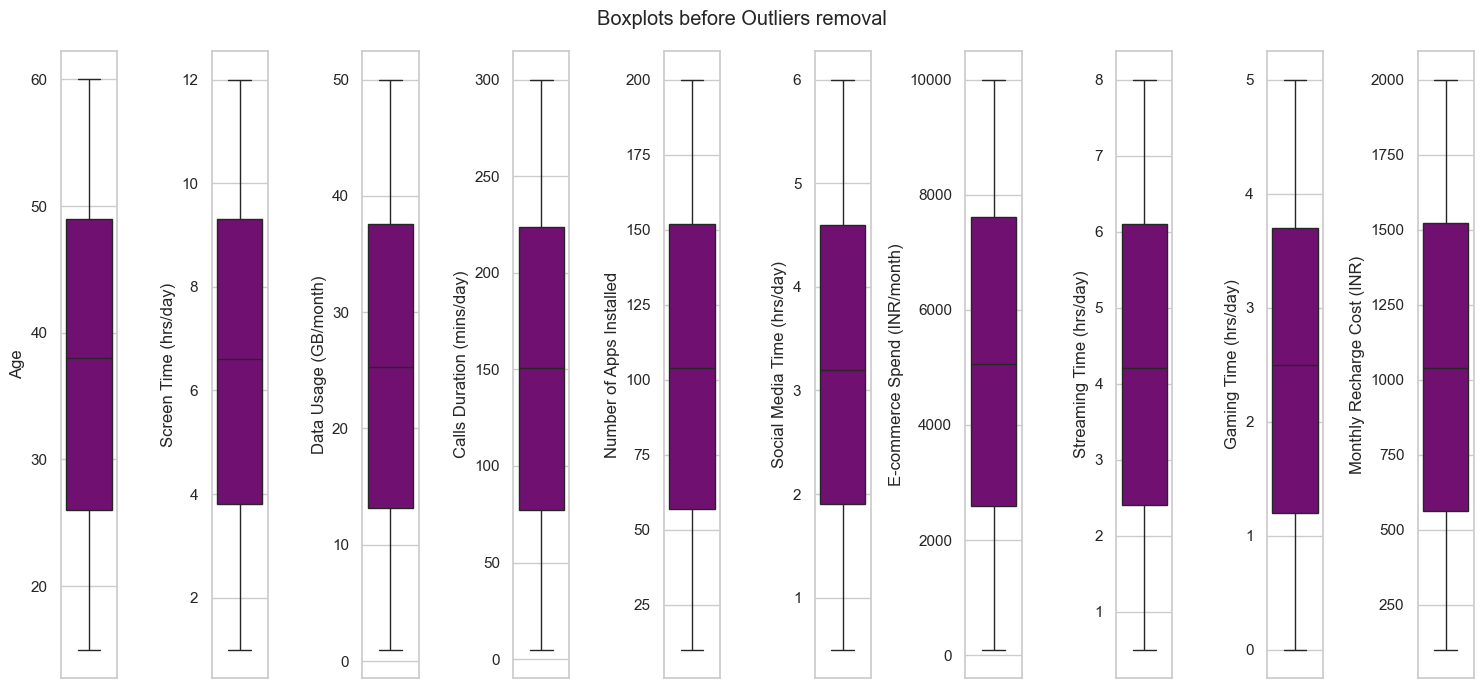

In [34]:
plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots before Outliers removal")
for i in range(0, len(numeric_cols)):
    plt.subplot(1, 10, i+1)
    sns.boxplot(y=df[numeric_cols[i]],color='purple',)
    plt.tight_layout()

## Exploratory Data Analysis - EDA

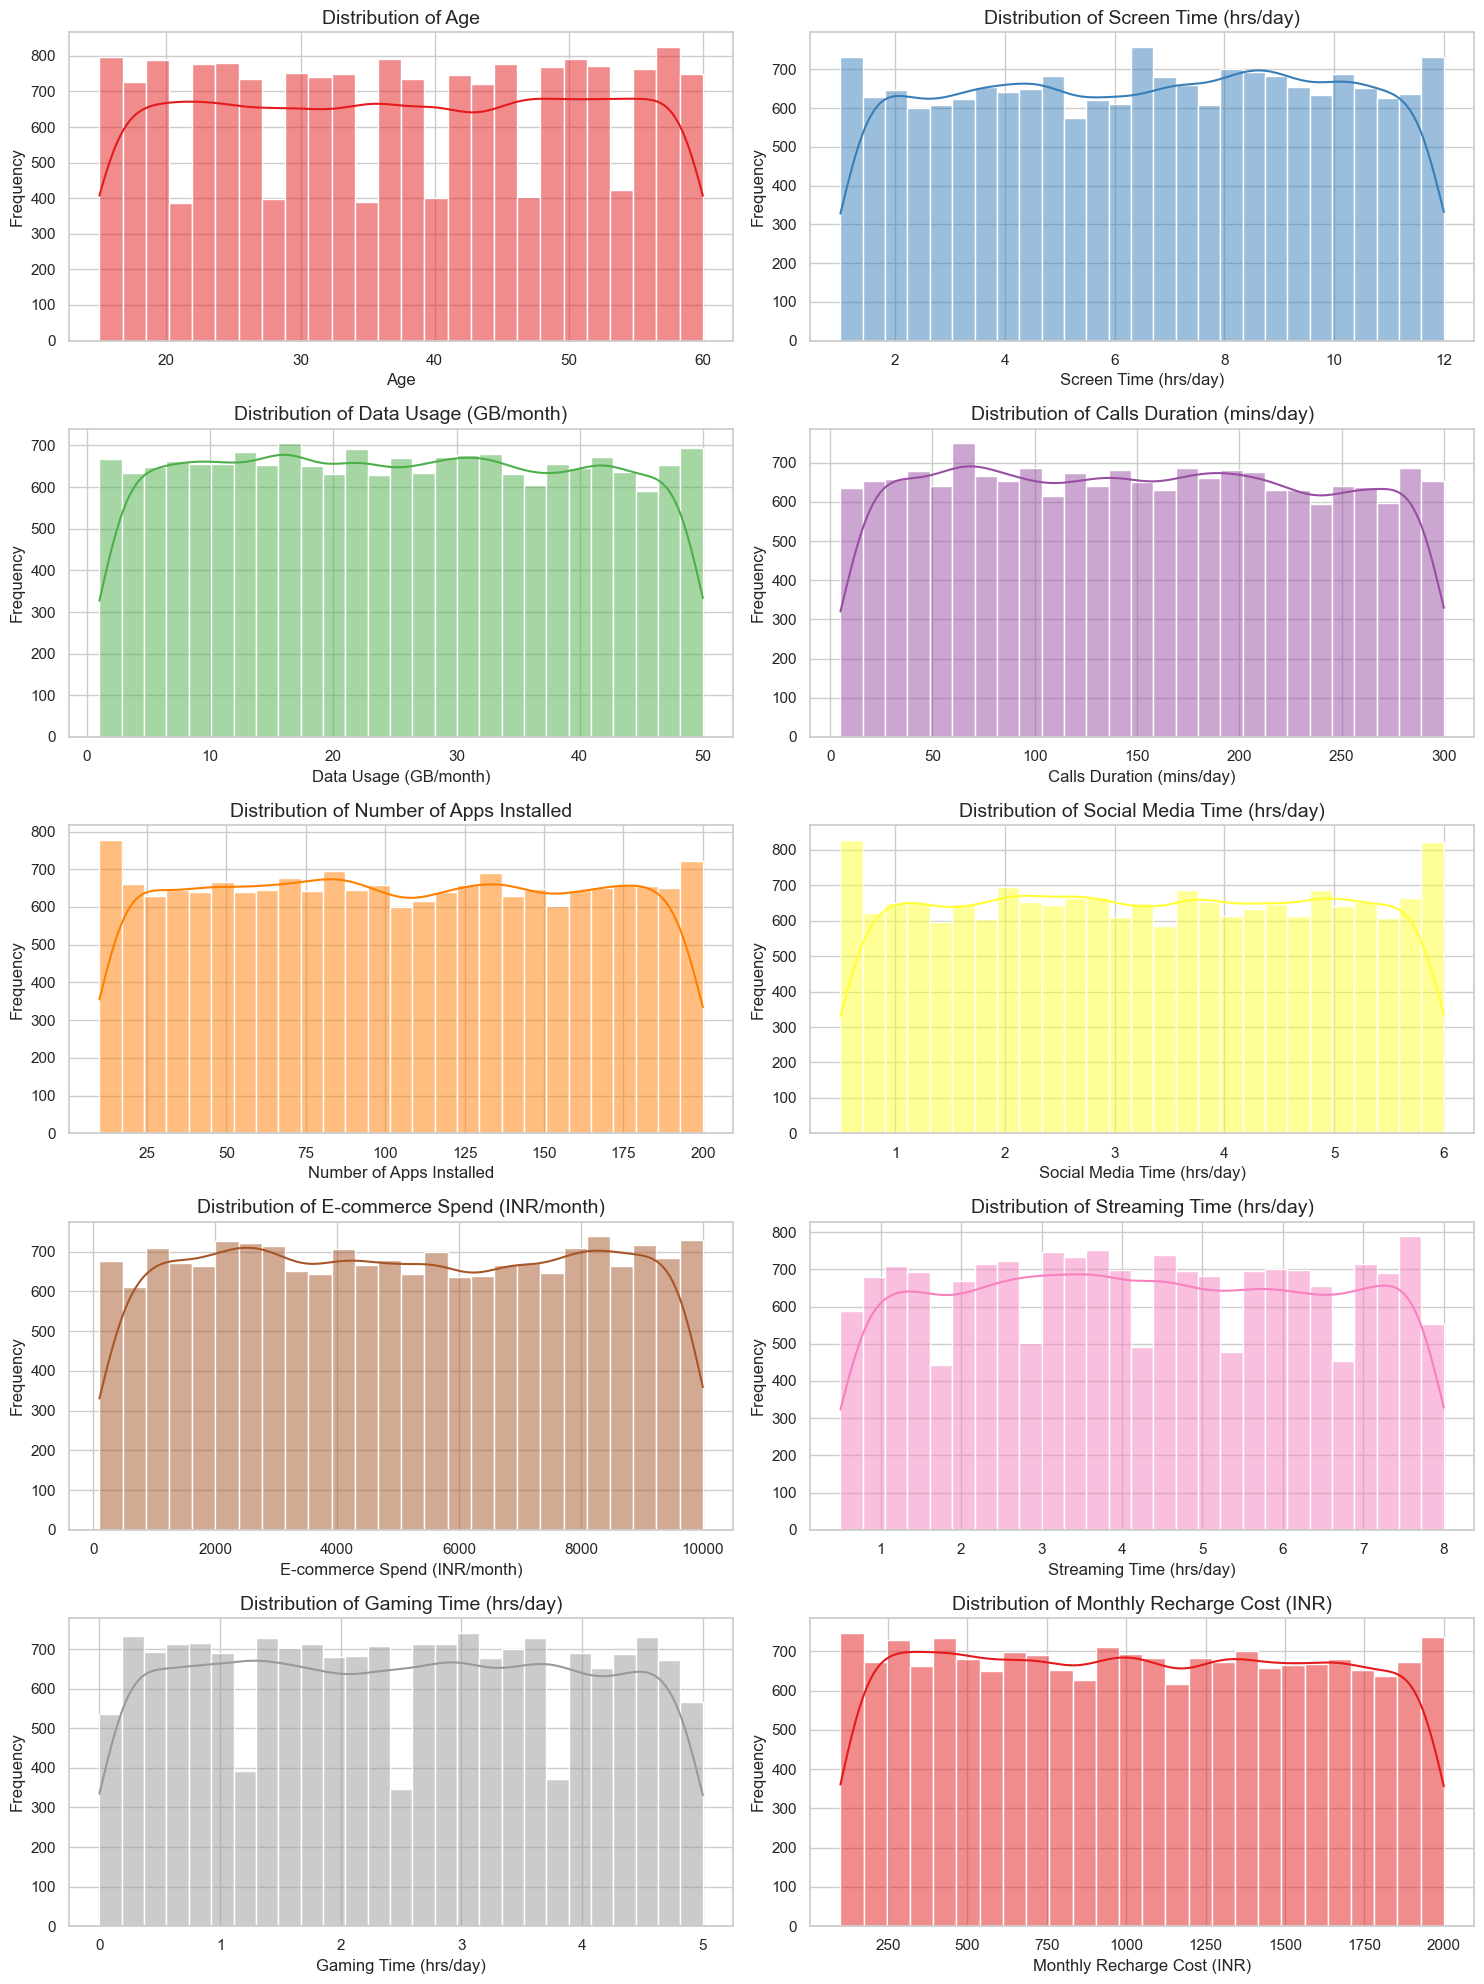

In [35]:
# Distribution of Numeric Variables
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, color=sns.color_palette("Set1", len(numeric_cols))[i], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.savefig('Distribution.png')
plt.show()

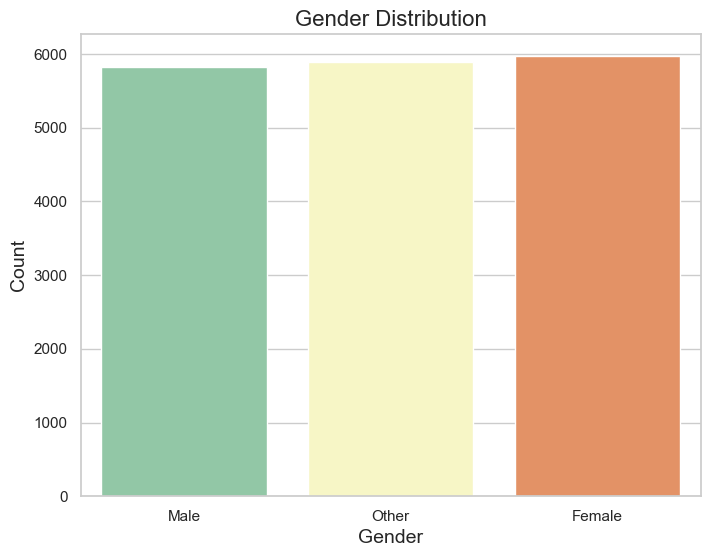

In [38]:
# Gender Distribution and Usage Patterns
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Gender", hue='Gender', palette="Spectral_r")
plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.savefig('Gender Distribution.png')
plt.show()

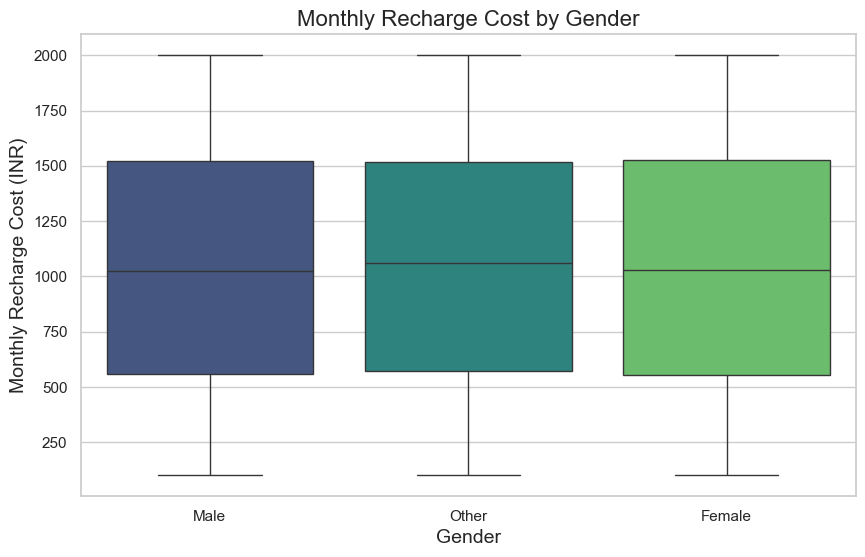

In [40]:
# Gender vs. Monthly Recharge Cost
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Gender", y="Monthly Recharge Cost (INR)", hue='Gender', palette="viridis")
plt.title("Monthly Recharge Cost by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Monthly Recharge Cost (INR)", fontsize=14)
plt.savefig('Monthly Recharge Cost by Gender.png')
plt.show()

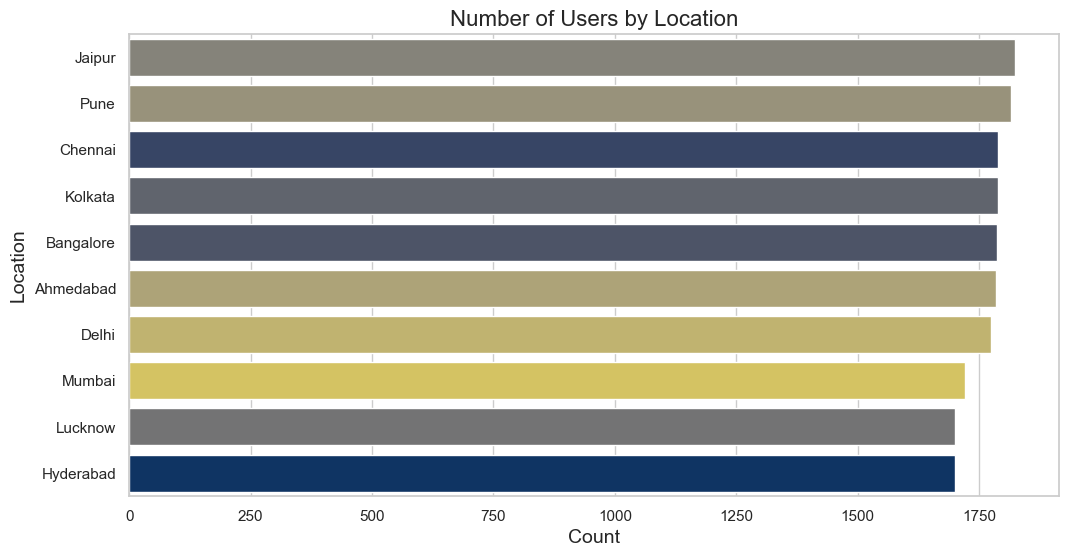

In [42]:
# Location-wise Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="Location", hue='Location', order=df["Location"].value_counts().index, palette="cividis_r")
plt.title("Number of Users by Location", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.savefig('Number of Users by Location.png')
plt.show()

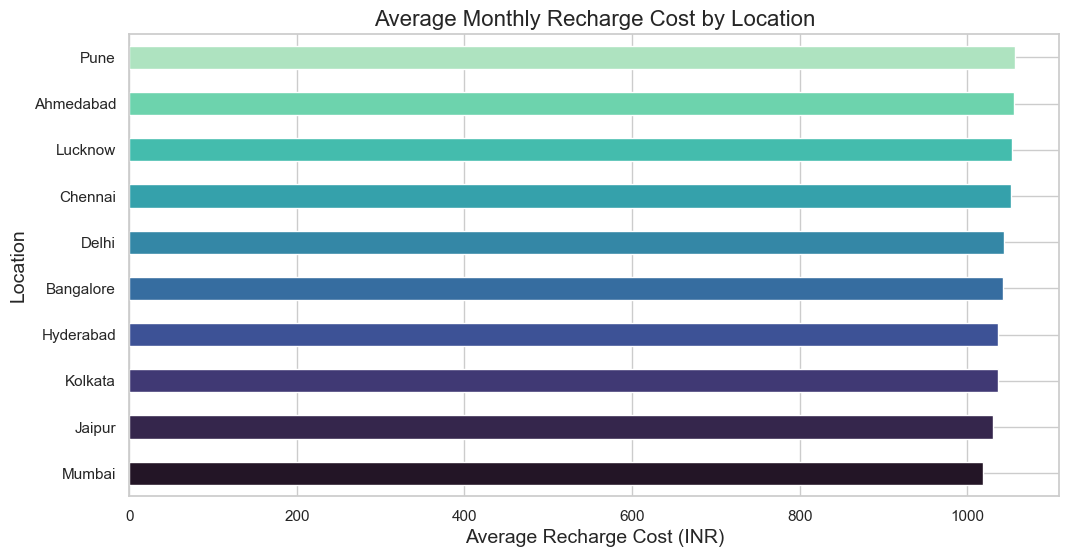

In [44]:
# Average Monthly Recharge Cost by Location
location_recharge = df.groupby("Location")["Monthly Recharge Cost (INR)"].mean().sort_values()

plt.figure(figsize=(12, 6))
location_recharge.plot(kind="barh", color=sns.color_palette("mako", len(location_recharge)))
plt.title("Average Monthly Recharge Cost by Location", fontsize=16)
plt.xlabel("Average Recharge Cost (INR)", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.savefig('Average Monthly Recharge Cost by Location.png')
plt.show()

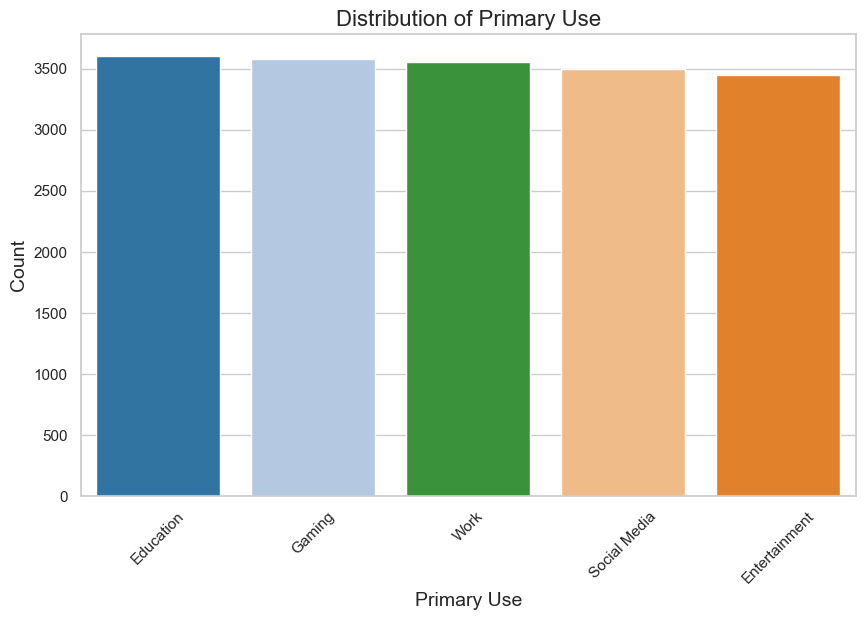

In [46]:
# Primary Use Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Primary Use", hue='Primary Use', order=df["Primary Use"].value_counts().index, palette="tab20")
plt.title("Distribution of Primary Use", fontsize=16)
plt.xlabel("Primary Use", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.savefig('Distribution of Primary Use.png')
plt.show()

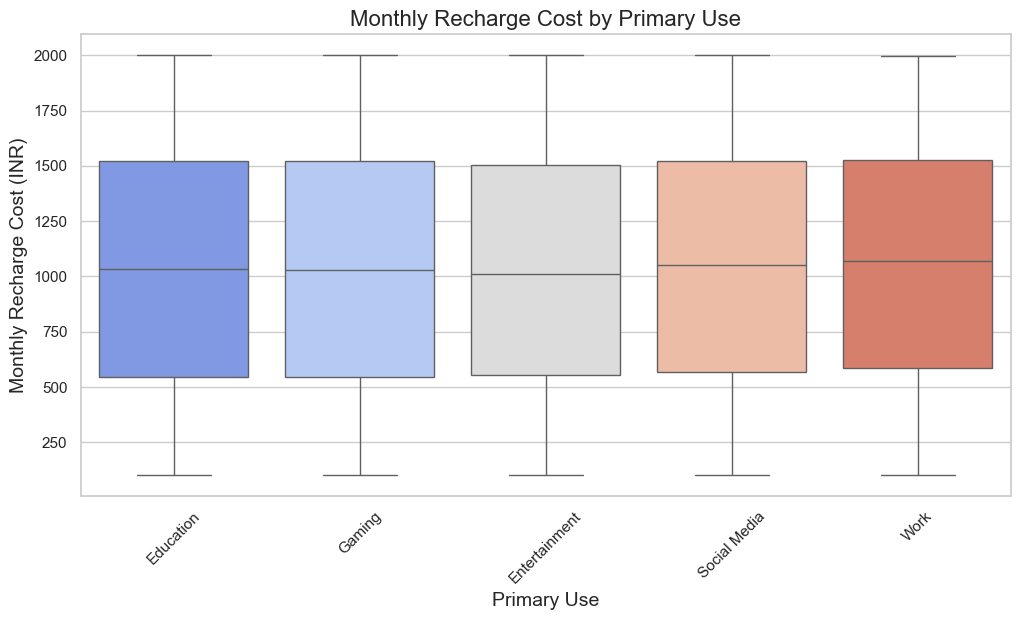

In [64]:
# Monthly Recharge Cost by Primary Use
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Primary Use", hue='Primary Use', y="Monthly Recharge Cost (INR)", palette="coolwarm")
plt.title("Monthly Recharge Cost by Primary Use", fontsize=16)
plt.xlabel("Primary Use", fontsize=14)
plt.ylabel("Monthly Recharge Cost (INR)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

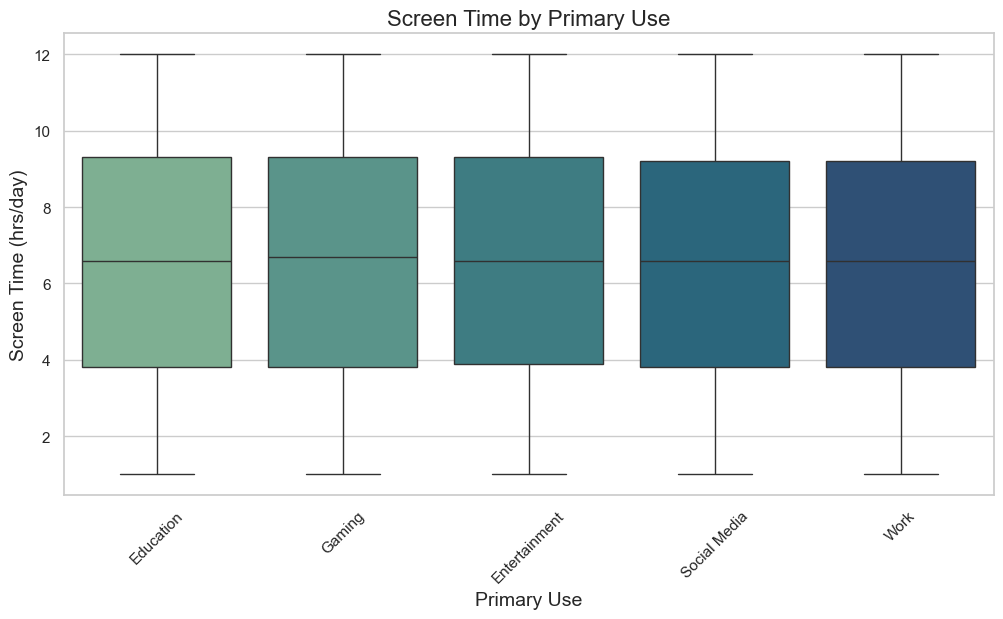

In [50]:
# Screen Time by Primary Use
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Primary Use", y="Screen Time (hrs/day)", hue='Primary Use', palette="crest")
plt.title("Screen Time by Primary Use", fontsize=16)
plt.xlabel("Primary Use", fontsize=14)
plt.ylabel("Screen Time (hrs/day)", fontsize=14)
plt.xticks(rotation=45)
plt.savefig('Screen Time by Primary Use.png')
plt.show()

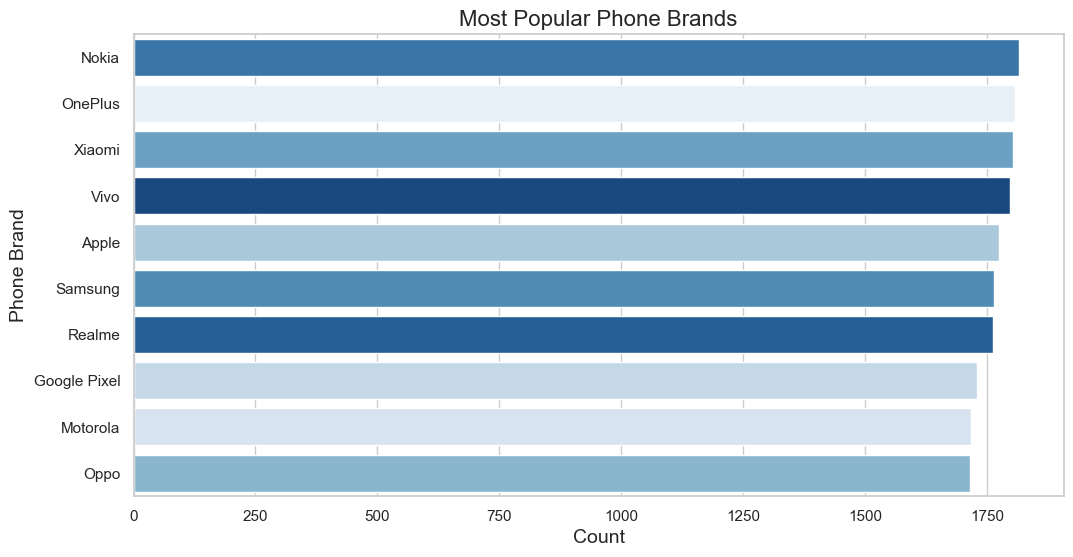

In [52]:
# Phone Brand and OS Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="Phone Brand", hue="Phone Brand", order=df["Phone Brand"].value_counts().index, palette="Blues_r")
plt.title("Most Popular Phone Brands", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Phone Brand", fontsize=14)
plt.savefig('Most Popular Phone Brands.png')
plt.show()

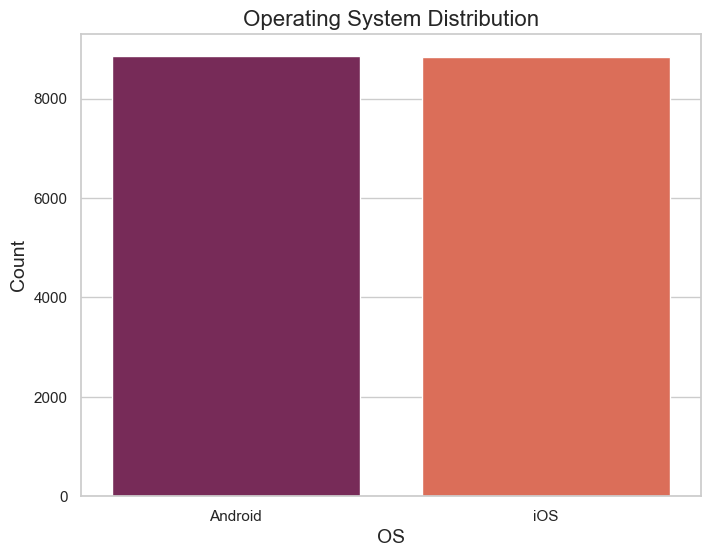

In [54]:
# OS Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="OS", hue="OS", palette="rocket")
plt.title("Operating System Distribution", fontsize=16)
plt.xlabel("OS", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.savefig('Operating System Distribution.png')
plt.show()

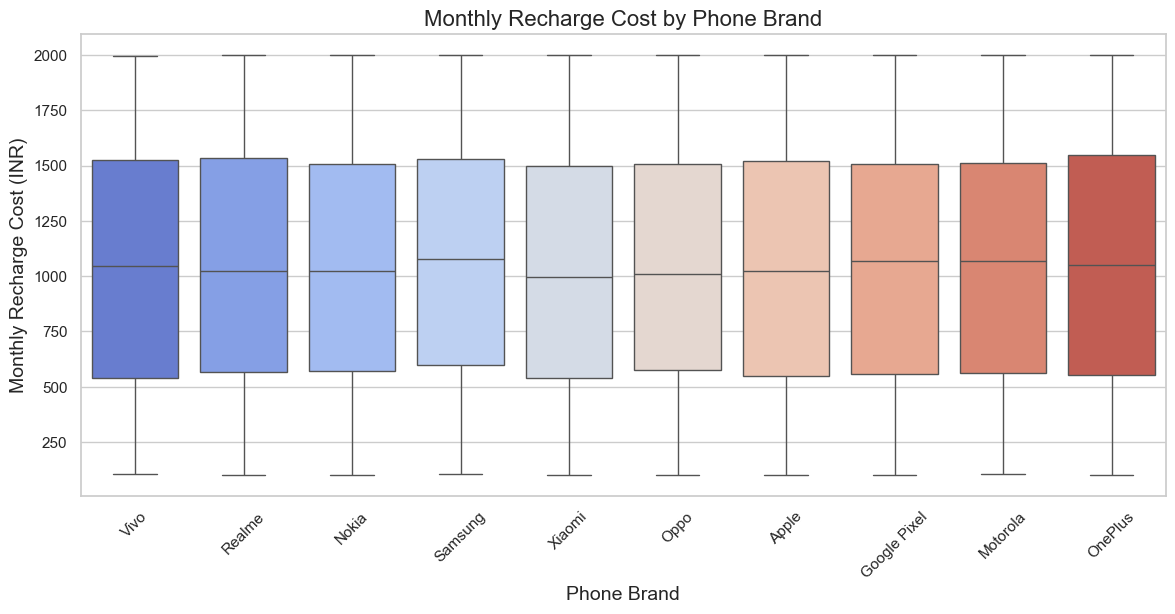

In [56]:
# Monthly Recharge Cost by Phone Brand
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Phone Brand", hue="Phone Brand", y="Monthly Recharge Cost (INR)", palette="coolwarm")
plt.title("Monthly Recharge Cost by Phone Brand", fontsize=16)
plt.xlabel("Phone Brand", fontsize=14)
plt.ylabel("Monthly Recharge Cost (INR)", fontsize=14)
plt.xticks(rotation=45)
plt.savefig('Monthly Recharge Cost by Phone Brand.png')
plt.show()

In [60]:
# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

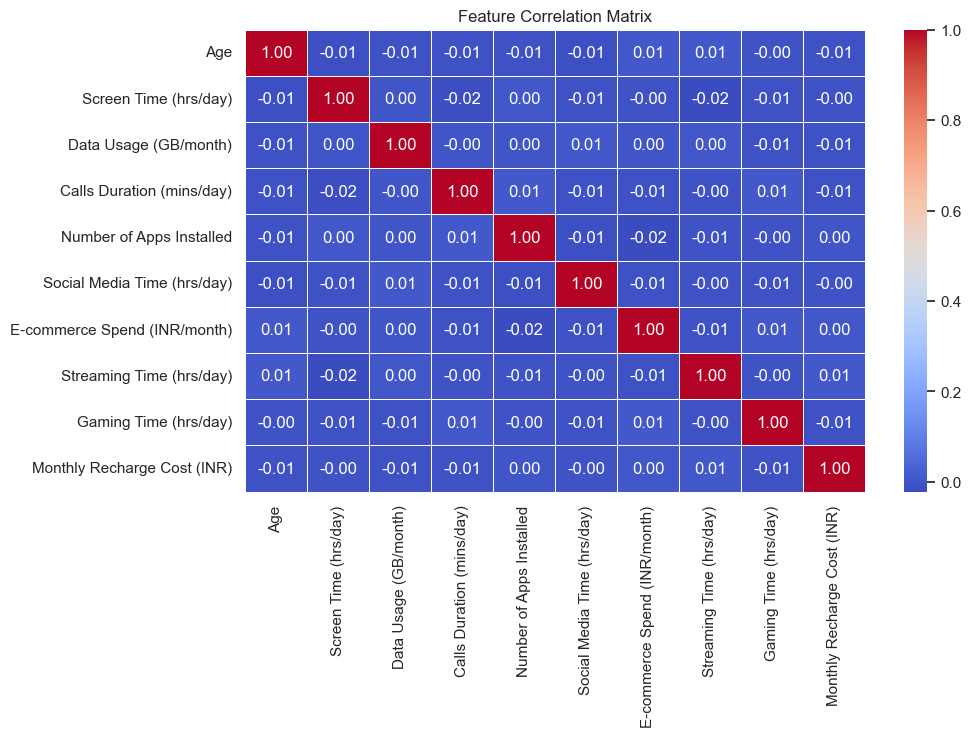

In [62]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.savefig('Feature Correlation Matrix.png')
plt.show()

### Feature Engineering

In [15]:
# Total Phone Usage Time (sum of all usage types)
df["Total_Usage_Time"] = (
    df["Screen Time (hrs/day)"] +
    df["Social Media Time (hrs/day)"] +
    df["Streaming Time (hrs/day)"] +
    df["Gaming Time (hrs/day)"]
)

In [17]:
# Create Entertainment Index: average of streaming, gaming, and social media
df["Entertainment_Index"] = (
    df["Streaming Time (hrs/day)"] +
    df["Gaming Time (hrs/day)"] +
    df["Social Media Time (hrs/day)"]
) / 3

In [19]:
# Create Spend Ratio: E-commerce Spend vs. Recharge Cost
df["Spend_Ratio"] = df["E-commerce Spend (INR/month)"] / (df["Monthly Recharge Cost (INR)"] + 1)

In [21]:
# Bin Age into age groups
df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[0, 18, 30, 45, 60, 100],
    labels=["Teen", "Young Adult", "Adult", "Middle Aged", "Senior"]
)

In [23]:
df["Usage per App"] = df["Screen Time (hrs/day)"] / df["Number of Apps Installed"]

In [25]:
df["Data Usage per Hour"] = df["Data Usage (GB/month)"] / (df["Screen Time (hrs/day)"] * 30)

In [27]:
df["Call Duration per Day (hrs)"] = df["Calls Duration (mins/day)"] / 60

In [29]:
df.head()

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),...,Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Total_Usage_Time,Entertainment_Index,Spend_Ratio,Age_Group,Usage per App,Data Usage per Hour,Call Duration per Day (hrs)
0,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,...,4.1,803,Education,16.9,4.400000,0.583333,Middle Aged,0.035577,0.215315,0.631667
1,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,...,0.4,1526,Gaming,17.5,2.766667,3.272430,Middle Aged,0.054438,0.101812,0.228333
2,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,...,2.9,1619,Entertainment,12.1,2.533333,1.469753,Adult,0.046875,0.091111,1.113333
3,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,...,0.3,1560,Entertainment,19.7,2.900000,0.759129,Adult,0.075342,0.077576,2.603333
4,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,...,2.3,742,Social Media,13.4,3.733333,0.142665,Teen,0.025581,0.037879,3.936667


In [31]:
df.to_csv('after_feature.csv')

## Encoding the categorical columns

In [74]:
# Make a copy to work with
df_encoded = df.copy()

In [76]:
# Encode target variable
label_encoder = LabelEncoder()
df_encoded["Primary Use"] = label_encoder.fit_transform(df_encoded["Primary Use"])

In [80]:
original_labels = label_encoder.inverse_transform(df_encoded["Primary Use"])

In [82]:
df_encoded["Primary Use (original)"] = original_labels

In [84]:
print(df_encoded[["Primary Use", "Primary Use (original)"]])

       Primary Use Primary Use (original)
0                0              Education
1                2                 Gaming
2                1          Entertainment
3                1          Entertainment
4                3           Social Media
...            ...                    ...
17681            1          Entertainment
17682            0              Education
17683            1          Entertainment
17684            4                   Work
17685            2                 Gaming

[17686 rows x 2 columns]


In [37]:
df_encoded = df_encoded.drop('Age', axis=1)

In [39]:
# Encode categorical features
categorical_cols = ["Gender", "Location", "Phone Brand", "OS", "Age_Group"]
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True, dtype='int')

## Standardize numerical features

In [41]:
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [43]:
df_encoded.head()

,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,...,Phone Brand_Oppo,Phone Brand_Realme,Phone Brand_Samsung,Phone Brand_Vivo,Phone Brand_Xiaomi,OS_iOS,Age_Group_Young Adult,Age_Group_Adult,Age_Group_Middle Aged,Age_Group_Senior
0,-0.897178,-0.107016,-1.336606,-0.010592,0.407269,-1.604273,0.440422,1.112841,-0.434011,0,...,0,0,0,1,0,0,0,0,1,0
1,0.836423,0.190397,-1.621577,1.166612,-0.284477,-0.027410,0.394032,-1.446009,0.874618,2,...,0,1,0,0,0,1,0,0,1,0
2,-0.645018,-0.928443,-0.996289,-0.155479,-0.158705,-0.938424,-1.183239,0.282944,1.042948,1,...,0,0,0,0,0,0,0,1,0,0
3,1.403783,0.013365,0.056454,0.750063,1.224788,-1.354928,-0.487384,-1.515167,0.936158,1,...,0,0,1,0,0,0,0,1,0,0
4,-1.369978,-1.622407,0.998507,-0.336588,1.413446,-1.730687,-0.394604,-0.132005,-0.544421,3,...,0,0,0,0,1,1,0,0,0,0


In [45]:
df_encoded.to_csv('after_scaling.csv')

In [171]:
# Separate features and target
X = df_encoded.drop(columns=["Primary Use"])
y = df_encoded["Primary Use"]

## Feature importance

In [153]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
feature_importance_df

,Feature,Importance
5,E-commerce Spend (INR/month),0.058764
11,Spend_Ratio,0.058326
8,Monthly Recharge Cost (INR),0.058316
13,Data Usage per Hour,0.057111
1,Data Usage (GB/month),0.056972
12,Usage per App,0.056830
3,Number of Apps Installed,0.056131
2,Calls Duration (mins/day),0.054607
14,Call Duration per Day (hrs),0.054354
9,Total_Usage_Time,0.053430


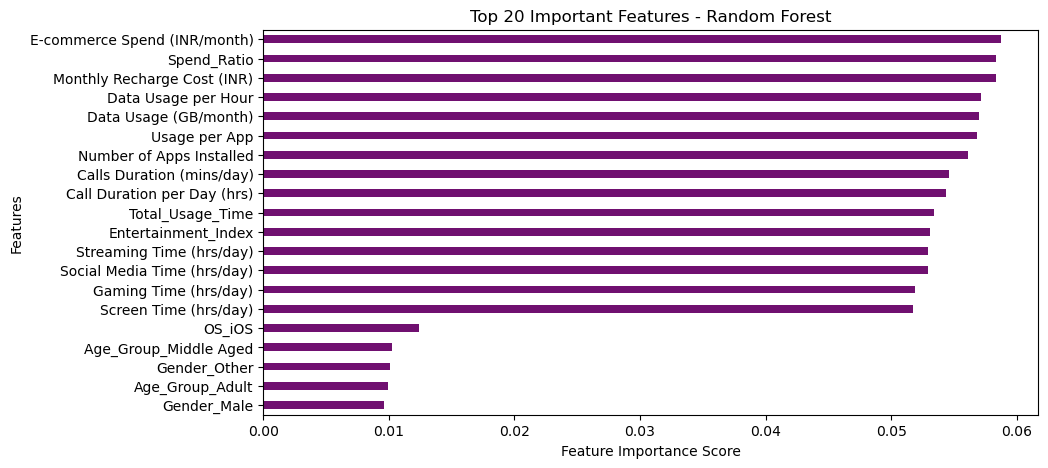

In [155]:
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance_df['Importance'][:20], y=feature_importance_df['Feature'][:20], color='purple', width=0.4)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 20 Important Features - Random Forest")
plt.show()

In [157]:
feature_importance_df['Feature'][:20].tolist()

['E-commerce Spend (INR/month)',
 'Spend_Ratio',
 'Monthly Recharge Cost (INR)',
 'Data Usage per Hour',
 'Data Usage (GB/month)',
 'Usage per App',
 'Number of Apps Installed',
 'Calls Duration (mins/day)',
 'Call Duration per Day (hrs)',
 'Total_Usage_Time',
 'Entertainment_Index',
 'Streaming Time (hrs/day)',
 'Social Media Time (hrs/day)',
 'Gaming Time (hrs/day)',
 'Screen Time (hrs/day)',
 'OS_iOS',
 'Age_Group_Middle Aged',
 'Gender_Other',
 'Age_Group_Adult',
 'Gender_Male']

### Split features and target variable

In [173]:
# Use the top 20 important features based on earlier analysis
top_20_features = [
    'E-commerce Spend (INR/month)', 'Spend_Ratio', 'Monthly Recharge Cost (INR)', 
    'Data Usage per Hour', 'Data Usage (GB/month)', 'Usage per App',
    'Number of Apps Installed', 'Calls Duration (mins/day)', 'Call Duration per Day (hrs)',
    'Total_Usage_Time', 'Entertainment_Index', 'Streaming Time (hrs/day)',
    'Social Media Time (hrs/day)', 'Gaming Time (hrs/day)', 'Screen Time (hrs/day)',
    'OS_iOS', 'Age_Group_Middle Aged', 'Gender_Other', 'Age_Group_Adult', 'Gender_Male'
]

# Target variable
target = 'Primary Use'

In [175]:
# Features and target
X_top20 = df_encoded[top_20_features]
y = df_encoded[target]

In [177]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_top20, y, test_size=0.2, random_state=42)

In [181]:
# Confirm data shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14148, 20), (3538, 20), (14148,), (3538,))

In [183]:
# Models and parameters
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    }),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    })
}

In [185]:
best_acc = 0
best_model_name = ""
best_model_object = None

In [187]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


🔧 Training Logistic Regression...

📊 Evaluation on Test Data - Logistic Regression (Before Tuning)
Accuracy : 0.1979
Precision: 0.1971
Recall   : 0.1979
F1 Score : 0.1946


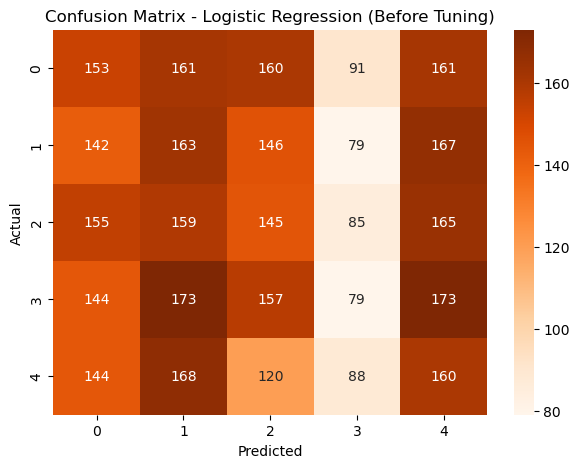


🔍 Hyperparameter tuning for Logistic Regression...

📈 Evaluation on Test Data - Logistic Regression (After Tuning)
Accuracy : 0.1981
Precision: 0.1975
Recall   : 0.1981
F1 Score : 0.1950
🔧 Best Parameters: {'C': 10}


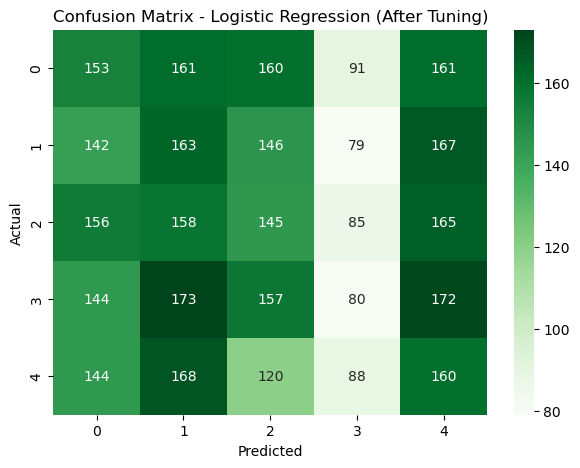

📉 Performing 5-Fold Cross-Validation (After Tuning)...
⚙️  Cross-Validation Accurancy Scores: [0.2075 0.2013 0.2024 0.2063 0.1987]
📈 Mean CV Accurancy Score (After Tuning): 0.2032

🔧 Training Decision Tree...

📊 Evaluation on Test Data - Decision Tree (Before Tuning)
Accuracy : 0.1843
Precision: 0.1843
Recall   : 0.1843
F1 Score : 0.1842


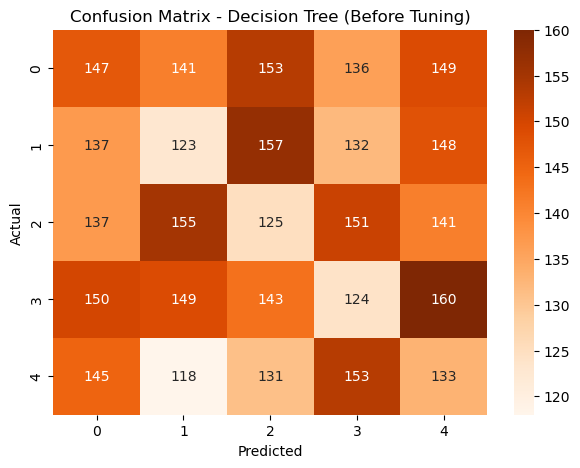


🔍 Hyperparameter tuning for Decision Tree...

📈 Evaluation on Test Data - Decision Tree (After Tuning)
Accuracy : 0.1888
Precision: 0.1888
Recall   : 0.1888
F1 Score : 0.1887
🔧 Best Parameters: {'max_depth': None, 'min_samples_split': 5}


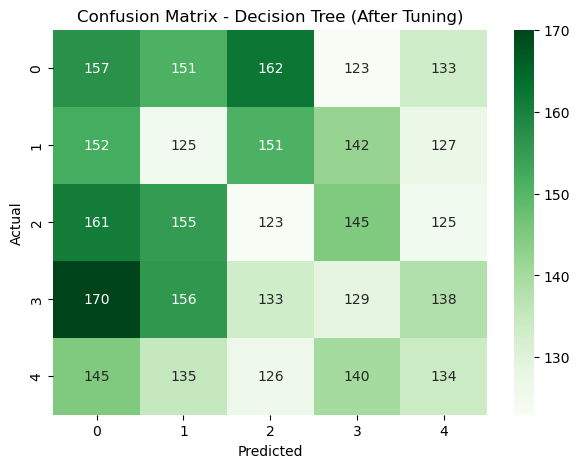

📉 Performing 5-Fold Cross-Validation (After Tuning)...
⚙️  Cross-Validation Accurancy Scores: [0.2123 0.1944 0.2137 0.1981 0.2002]
📈 Mean CV Accurancy Score (After Tuning): 0.2037

🔧 Training Random Forest...

📊 Evaluation on Test Data - Random Forest (Before Tuning)
Accuracy : 0.1990
Precision: 0.1989
Recall   : 0.1990
F1 Score : 0.1986


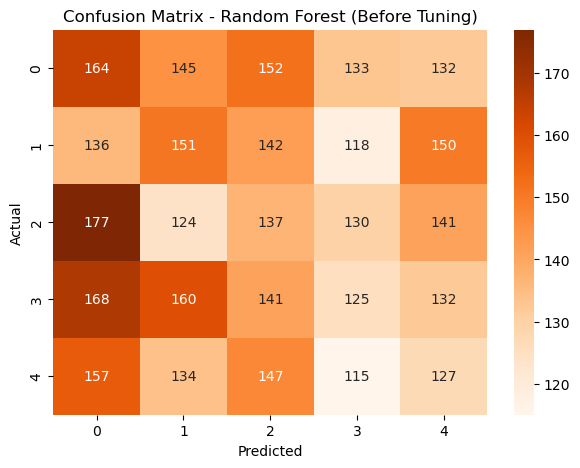


🔍 Hyperparameter tuning for Random Forest...

📈 Evaluation on Test Data - Random Forest (After Tuning)
Accuracy : 0.2060
Precision: 0.2059
Recall   : 0.2060
F1 Score : 0.2040
🔧 Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


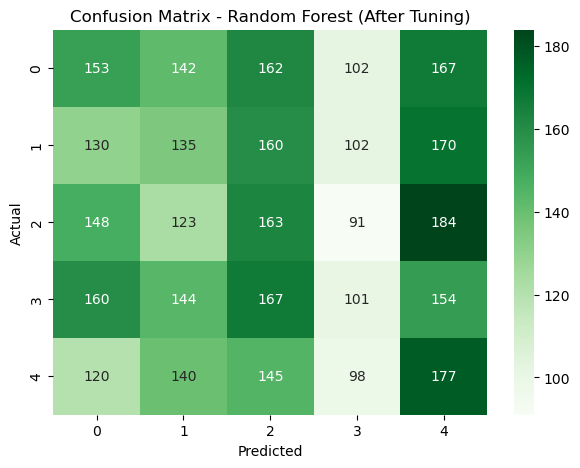

📉 Performing 5-Fold Cross-Validation (After Tuning)...
⚙️  Cross-Validation Accurancy Scores: [0.2158 0.1928 0.1963 0.211  0.1923]
📈 Mean CV Accurancy Score (After Tuning): 0.2016

🔧 Training Gradient Boosting...

📊 Evaluation on Test Data - Gradient Boosting (Before Tuning)
Accuracy : 0.1897
Precision: 0.1897
Recall   : 0.1897
F1 Score : 0.1887


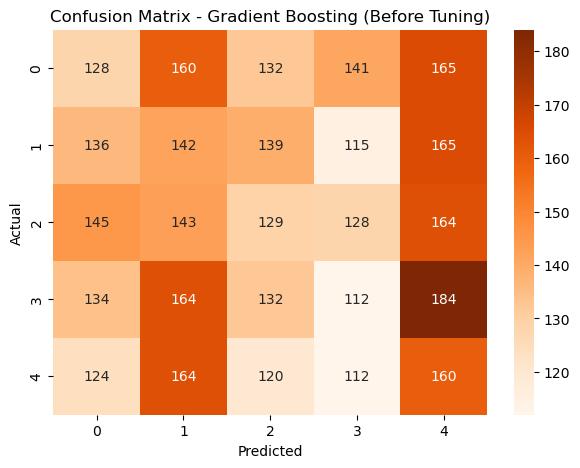


🔍 Hyperparameter tuning for Gradient Boosting...

📈 Evaluation on Test Data - Gradient Boosting (After Tuning)
Accuracy : 0.1897
Precision: 0.1897
Recall   : 0.1897
F1 Score : 0.1887
🔧 Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


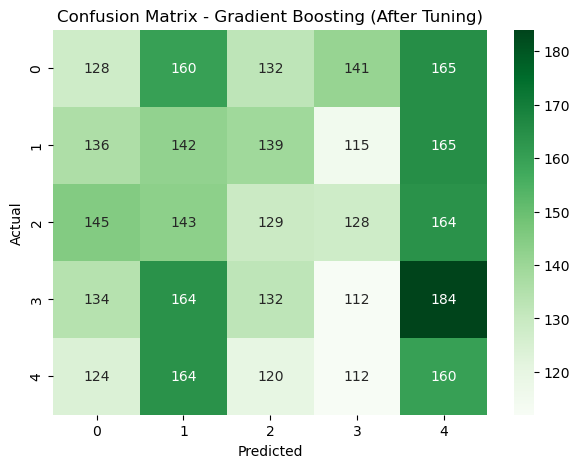

📉 Performing 5-Fold Cross-Validation (After Tuning)...
⚙️  Cross-Validation Accurancy Scores: [0.2107 0.1947 0.1988 0.2029 0.1942]
📈 Mean CV Accurancy Score (After Tuning): 0.2003

🔧 Training XGBoost...


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:21:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Evaluation on Test Data - XGBoost (Before Tuning)
Accuracy : 0.1959
Precision: 0.1960
Recall   : 0.1959
F1 Score : 0.1958


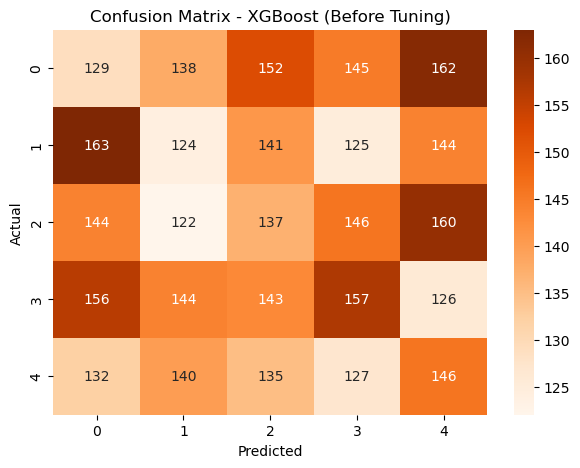


🔍 Hyperparameter tuning for XGBoost...


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:22:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📈 Evaluation on Test Data - XGBoost (After Tuning)
Accuracy : 0.1922
Precision: 0.1933
Recall   : 0.1922
F1 Score : 0.1917
🔧 Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


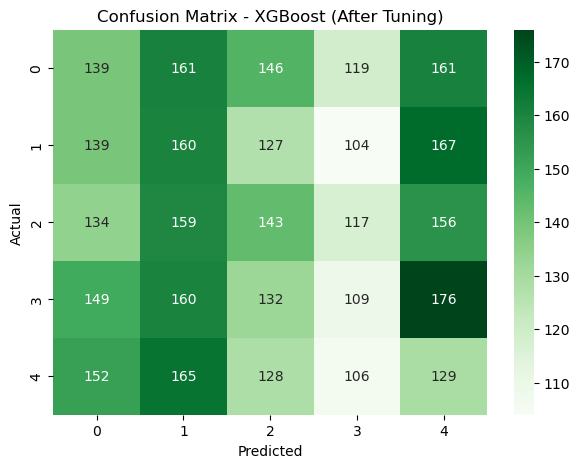

📉 Performing 5-Fold Cross-Validation (After Tuning)...
⚙️  Cross-Validation Accurancy Scores: [0.2021 0.1997 0.1913 0.1951 0.2063]
📈 Mean CV Accurancy Score (After Tuning): 0.1989

🏆 Best Tuned Model: Random Forest with Accuracy Score: 0.2060
💾 Model saved as: best_model_random_forest.pkl


In [189]:
for name, (model, param_grid) in models.items():
    print(f"\n🔧 Training {name}...")

    # Train the model (Before Hyperparameter Tuning)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n📊 Evaluation on Test Data - {name} (Before Tuning)")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")

    # Confusion matrix before tuning
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
    plt.title(f'Confusion Matrix - {name} (Before Tuning)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Hyperparameter tuning
    print(f"\n🔍 Hyperparameter tuning for {name}...")
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred_tuned = best_model.predict(X_test)

    acc_tuned = accuracy_score(y_test, y_pred_tuned)
    prec_tuned = precision_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
    rec_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
    f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

    print(f"\n📈 Evaluation on Test Data - {name} (After Tuning)")
    print(f"Accuracy : {acc_tuned:.4f}")
    print(f"Precision: {prec_tuned:.4f}")
    print(f"Recall   : {rec_tuned:.4f}")
    print(f"F1 Score : {f1_tuned:.4f}")
    print(f"🔧 Best Parameters: {grid.best_params_}")

    # Confusion matrix after tuning
    cm_tuned = confusion_matrix(y_test, y_pred_tuned)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix - {name} (After Tuning)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Perform Cross-Validation after Hyperparameter Tuning
    print(f"📉 Performing 5-Fold Cross-Validation (After Tuning)...")
    acc_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='f1_weighted', n_jobs=-1)
    print(f"⚙️  Cross-Validation Accurancy Scores: {np.round(acc_scores, 4)}")
    print(f"📈 Mean CV Accurancy Score (After Tuning): {acc_scores.mean():.4f}")

    # Save best model based on Accurancy
    if acc_tuned > best_acc:
        best_acc = acc_tuned
        best_model_name = name
        best_model_object = best_model

# Save best model
filename = f"best_model_{best_model_name.replace(' ', '_').lower()}.pkl"
joblib.dump(best_model_object, filename)

print(f"\n🏆 Best Tuned Model: {best_model_name} with Accuracy Score: {best_acc:.4f}")
print(f"💾 Model saved as: {filename}")

In [70]:
model = joblib.load("best_model_random_forest.pkl")

In [72]:
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
